<a href="https://colab.research.google.com/github/shujaaatkhan03/pandas_visualization_cincepts/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
import math
warnings.filterwarnings('ignore')

In [ ]:
test = pd.read_csv("Titanic_test.csv")
train = pd.read_csv("Titanic_train.csv")

In [ ]:
#eda
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# STATISTICAL REPORT FOR THE DATAFRAME

In [ ]:
print(f'The dataframe has {train.shape[0]} rows and {train.shape[1]} columns')

The dataframe has 891 rows and 12 columns


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are total 12 columns
Among which 5 are categorical feature with datatype Object
and 5 of them are numerical feature with datatype int64 and 2 of them are numerical feature with datatype float

In [ ]:
train.select_dtypes(exclude=['object']).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 1. Number of Data Points (Counts):
    => All numerical varaibles have 891 entries, except Age variable,it has 177 missing values.
##### 2. Central Tendency:
    => The mean (Average) and the median (50th percentile) are close for most variables, suggesting a fairly symmetric distribution for some variables. However, the difference for variables like Fare indicates potential skewness.
##### 3. Range:
    => The range (max-min) varies significantly across variables, highlighting the diversity in the dataset.

# EXPLORATORY DATA ANALYSIS

In [ ]:
## differentiate numerical and categorical columns
num_cols = train.select_dtypes(include=['int64','float64']) ## Numerical Columns
cat_cols = train.select_dtypes(include=['object']) ## Categorical Columns

In [ ]:
print(f'Number of Numerical Columns {len(num_cols.columns)}')
print(f'Number of Categorical Columns {len(cat_cols.columns)}')

Number of Numerical Columns 7
Number of Categorical Columns 5


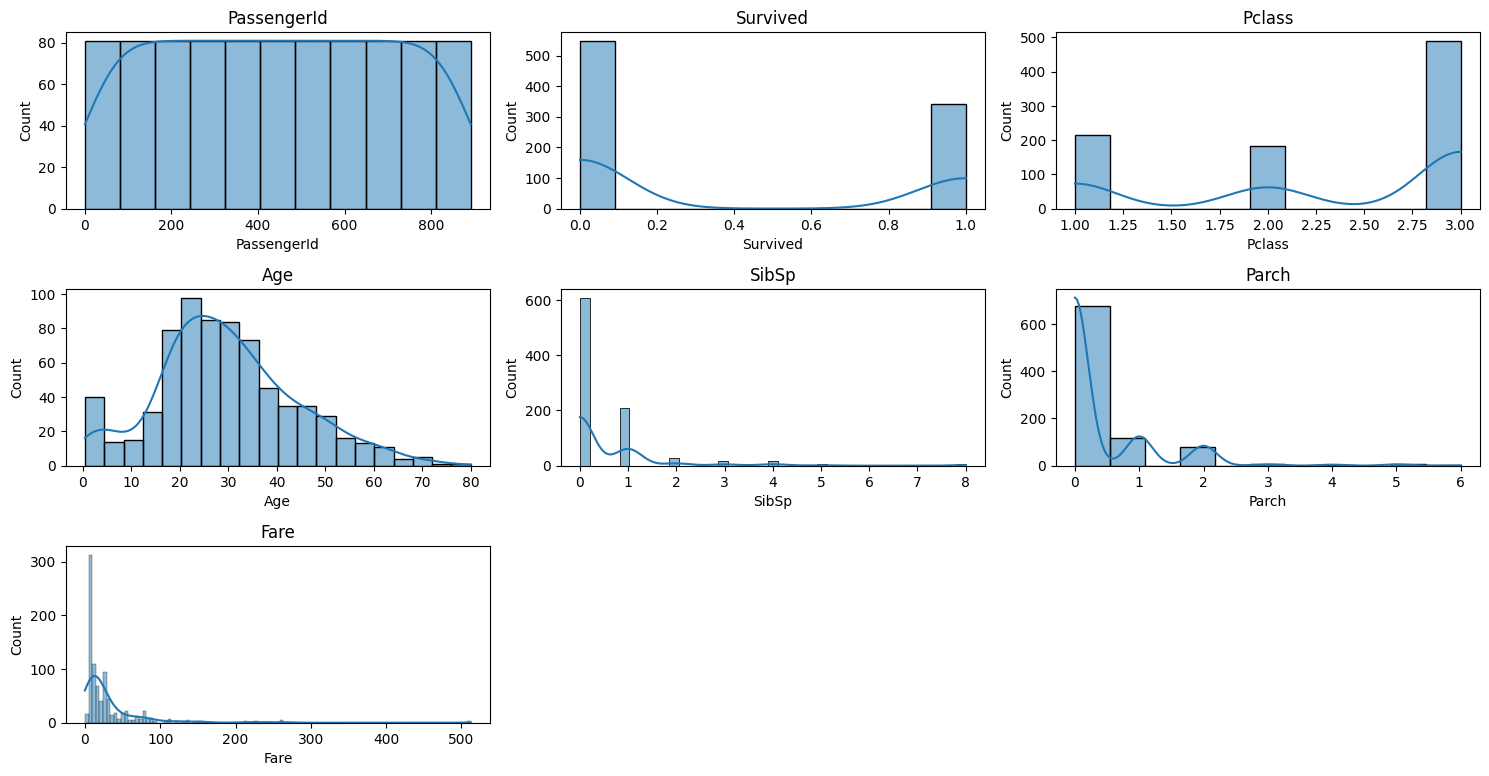

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sn.histplot(train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

##### Histogram Inferences
##### 1. Right Skewed (outliers in Higher Values)
    i.  Fare
    ii. Age

##### 2. Irregular curve(improper distribution)
    i.  SibSp
    ii. Pclass
    iii.Parch

In [ ]:

for col in ['Parch', 'SibSp', 'Pclass', 'Survived']:
  print(f"Value counts for {col}:")
  print(f"{num_cols[col].value_counts()} \n")

Value counts for Parch:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

Value counts for SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64 



From the above histograms we can infer that the there are a few numerical columns that have a few numbers as their categories they are more like a categorical columns like the
###i.SibSp
    SibbSp infers a person having a highest number of 5 sibilings and least of 0
  
###ii.Parch
    Parch infers that a person is having highest of 6 family members and lowest of 1 family member

###iii.Pclass
    Pclass infers there are total of 3 classes of passengers 1st 2nd and 3rd

###iv.Survived
    survived infers there are total 342 survived and 549 not survived    


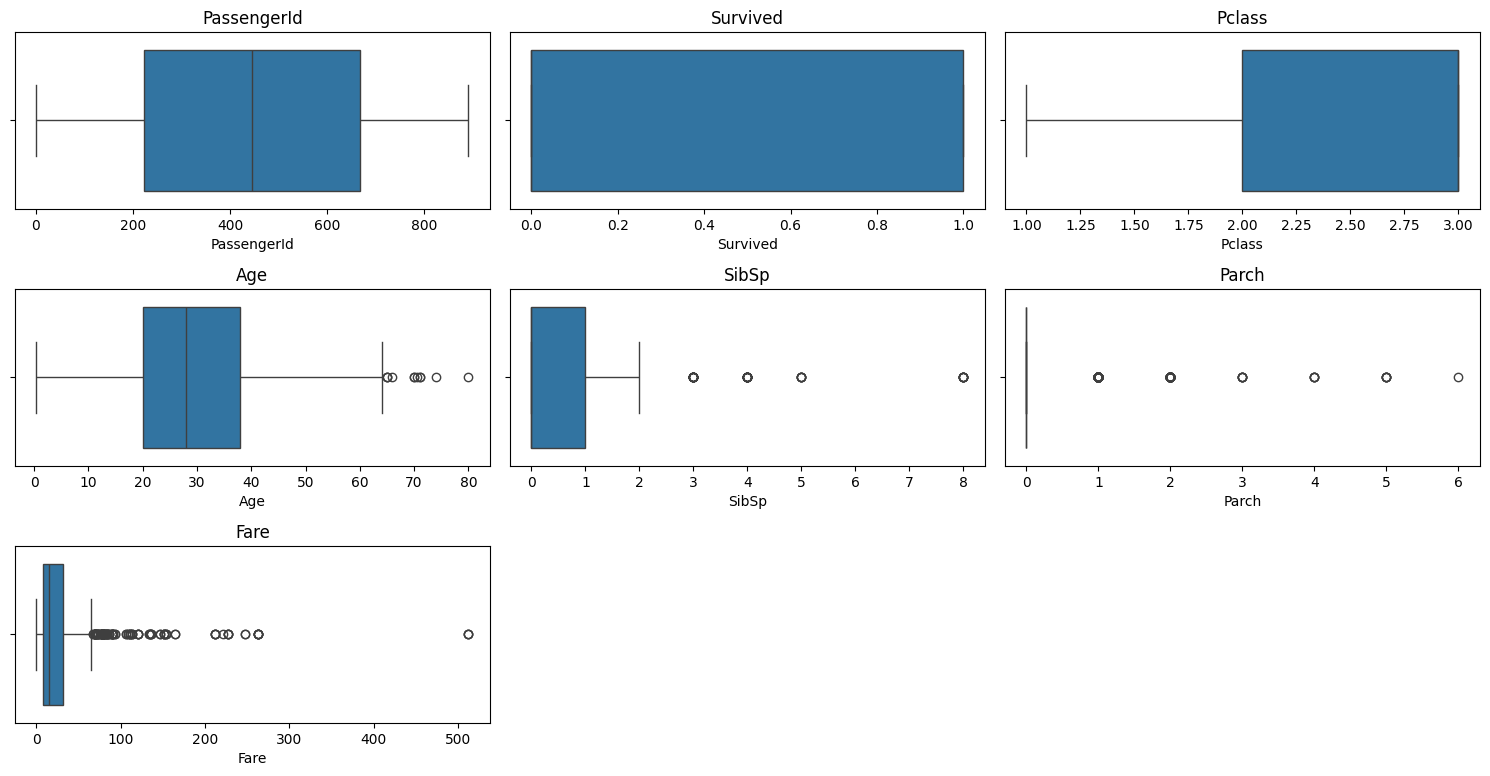

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sn.boxplot(x=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Also from the above boxplots we can conclude that the numerical column Passengerid has unique value for each entry that shows a lot of variance in it thus we have to drop that column for num_cols


####Fare
    The Fare boxplot shows a significant number of high-value outliers, indicating a substantial disparity in ticket prices.

####Age
    Age also has outliers, though less extreme than Fare.the null values in the Age column must also be filled with the mean or median value of the column

In [ ]:
cat_cols.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


As we look at the categorical columns we find a few unnecesary columns like

1.   Name column consists unique name for each entry in the data which might not contribute for our EDA nor our model building

2.   Ticket column also has a unique ticketid for each entry in the data so we might elimate it too
3.   Cabin consists manh null values and also doesn't comtribute for model building because its of no use.





In [ ]:
cat_cols.drop(["Name","Ticket","Cabin"],axis = 1 ,inplace = True)

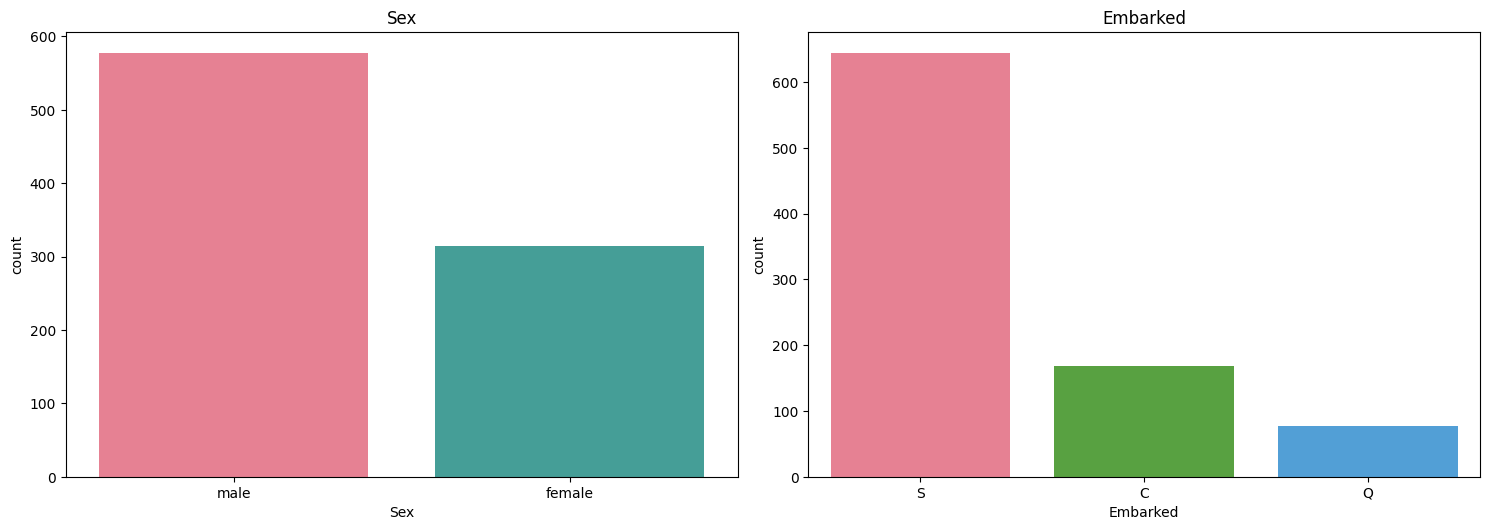

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sn.countplot(x=train[col], palette='husl')
    plt.title(col)
plt.tight_layout()
plt.show()

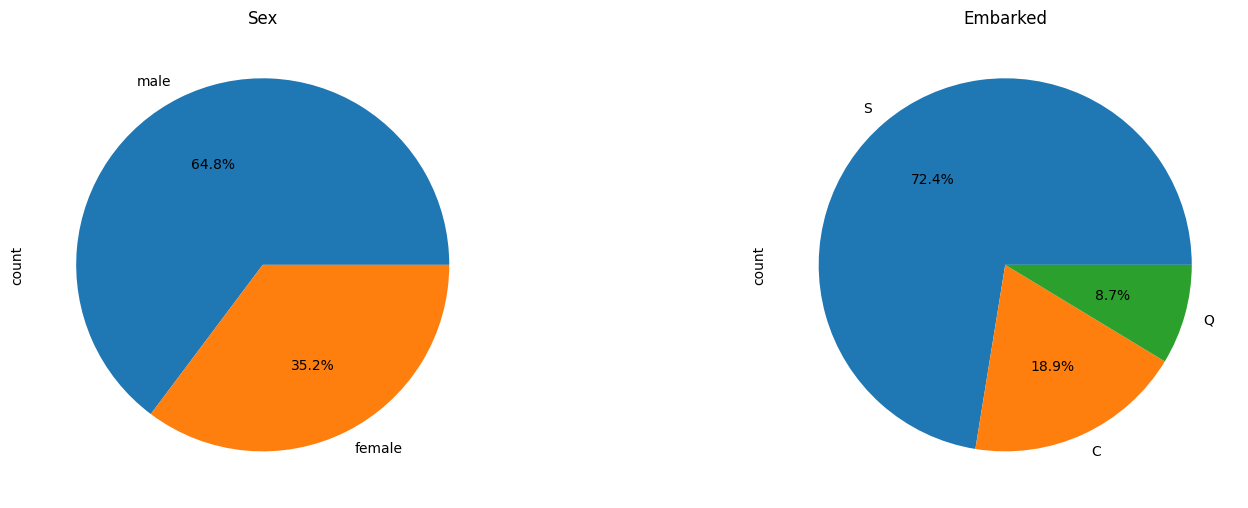

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    train[col].value_counts().plot.pie(autopct='%1.1f%%')  # Use value_counts for pie charts
    plt.title(col)

plt.tight_layout()
plt.show()

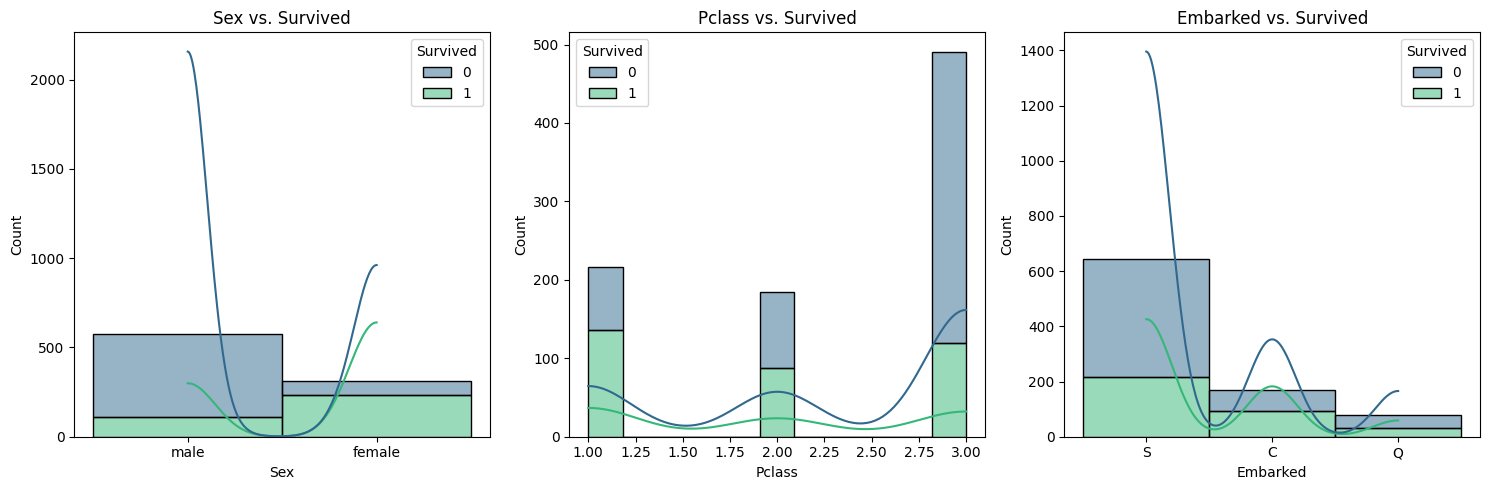

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' DataFrame is already loaded as in the provided code.

def colorful_hist_plots(df, features, target):
    """Generates colorful histogram plots for specified features against a target variable."""
    num_plots = len(features)
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue=target, multiple="stack", ax=axes[i], palette="viridis", kde=True)  # Using a stacked histogram with kde
        axes[i].set_title(f'{feature} vs. {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# Example usage (replace with your desired features and target)
features = ['Sex', 'Pclass', 'Embarked']
target = 'Survived'
colorful_hist_plots(train, features, target)

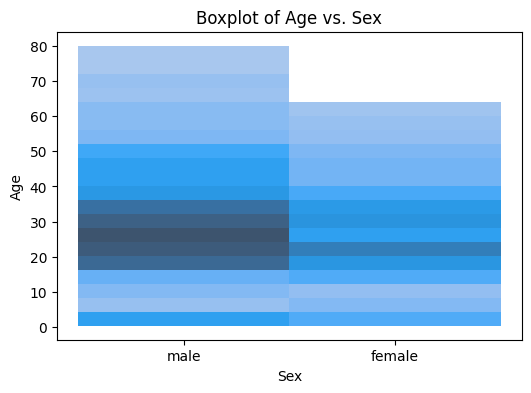

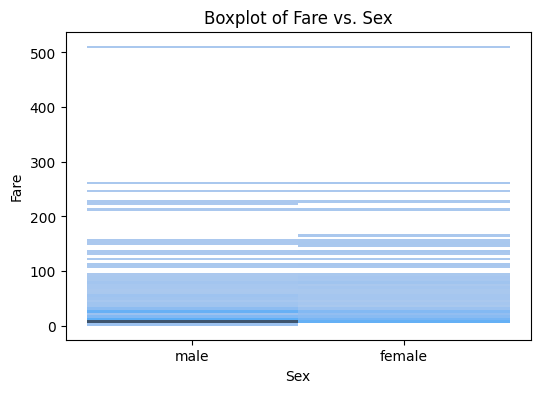

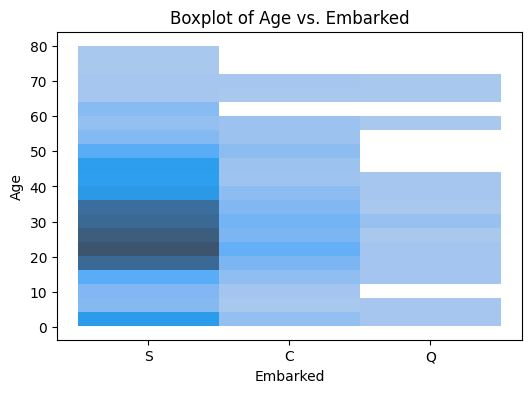

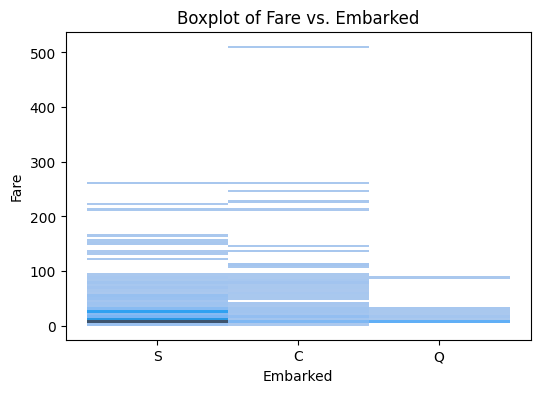

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_best_pair_plots(df, num_cols, cat_cols, target_col):
    """Generates pair plots of the best combinations of numerical and categorical columns.

    Args:
        df: The input DataFrame.
        num_cols: A list of numerical column names.
        cat_cols: A list of categorical column names.
        target_col: The name of the target column.
    """

    for cat_col in cat_cols:
        for num_col in num_cols:
          plt.figure(figsize=(6,4))
          sns.histplot(x=cat_col, y=num_col, data=df)
          plt.title(f'Boxplot of {num_col} vs. {cat_col}')
          plt.show()

# Example usage (assuming you have defined num_cols, cat_cols, and the DataFrame 'train'):
# Assuming 'Survived' is your target variable.
plot_best_pair_plots(train, ['Age', 'Fare'], ['Sex', 'Embarked'], 'Survived')

# DATA PREPROCESSING

Lets replace the null values of age variable with mean values of age


In [ ]:
mean_age = num_cols['Age'].mean()

num_cols['Age'].fillna(mean_age, inplace=True)

In [ ]:
num_cols.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


Removing passengerid because it is unique for each and every data entry

In [ ]:
num_cols.drop('PassengerId', axis=1, inplace=True)

Standardizing num_cols

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
num_cols[['Age', 'Fare']] = scaler.fit_transform(num_cols[['Age', 'Fare']])

num_cols_std = pd.DataFrame(num_cols, columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
le = LabelEncoder()
num_cols['Pclass'] = le.fit_transform(num_cols['Pclass'])
num_cols.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,2,-0.592481,1,0,-0.502445
1,1,0,0.638789,1,0,0.786845
2,1,2,-0.284663,0,0,-0.488854
3,1,0,0.407926,1,0,0.420730
4,0,2,0.407926,0,0,-0.486337


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])

cat_cols.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [ ]:
train_final = pd.concat([num_cols_std,cat_cols],axis=1)
train_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,2,-0.592481,1,0,-0.502445,1,2
1,1,0,0.638789,1,0,0.786845,0,0
2,1,2,-0.284663,0,0,-0.488854,0,2
3,1,0,0.407926,1,0,0.420730,0,2
4,0,2,0.407926,0,0,-0.486337,1,2


We now fit the model on train_final to predict the survived column
since we have two different dataset for testing and training we first predict on traing data build a logistic regression model.

In [ ]:
X_train = train_final.drop('Survived', axis=1)
Y_train = train_final['Survived']

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,2,-0.592481,1,0,-0.502445,1,2
1,0,0.638789,1,0,0.786845,0,0
2,2,-0.284663,0,0,-0.488854,0,2
3,0,0.407926,1,0,0.420730,0,2
4,2,0.407926,0,0,-0.486337,1,2


Pre-processing Test data

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Removing unnecessary columns in test data just like we did it in our training data

In [ ]:
test.drop(["Name","Ticket","Cabin","PassengerId"],axis = 1 ,inplace = True)

Standardising and Encoding numerical and categorical columns in test data.

In [ ]:
for col in test[['Pclass','Sex','Embarked']]:
    test[col] = le.fit_transform(test[col])

for col in test[['Age','Fare']]:
    test[col] = scaler.fit_transform(test[[col]])

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,0.298549,0,0,-0.497811,1
1,2,0,1.181328,1,0,-0.512660,2
2,1,1,2.240662,0,0,-0.464532,1
3,2,1,-0.231118,0,0,-0.482888,2
4,2,0,-0.584229,1,1,-0.417971,2


Re-ordering the test data's columns as in the train_final datasets order

In [ ]:

train_columns = X_train.columns.tolist()

test = test[train_columns]

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,2,0.298549,0,0,-0.497811,1,1
1,2,1.181328,1,0,-0.512660,0,2
2,1,2.240662,0,0,-0.464532,1,1
3,2,-0.231118,0,0,-0.482888,1,2
4,2,-0.584229,1,1,-0.417971,0,2


Building Logistic Regression model since our target variable is categirical(Binary)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred_train = model1.predict(X_train)
train_accuracy = accuracy_score(Y_train,Y_pred_train)

In [ ]:
print(train_accuracy)

0.8002244668911336


In [ ]:
test.isnull().sum()

,0
Pclass,0
Age,86
SibSp,0
Parch,0
Fare,1
Sex,0
Embarked,0


Removing null values in test data

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [ ]:
y_pred_test = model1.predict(test)

In [ ]:
#create a column "Survived" in test  and push those values of y_pred_test

test['Survived'] = y_pred_test

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
0,2,0.298549,0,0,-0.497811,1,1,0
1,2,1.181328,1,0,-0.512660,0,2,0
2,1,2.240662,0,0,-0.464532,1,1,0
3,2,-0.231118,0,0,-0.482888,1,2,0
4,2,-0.584229,1,1,-0.417971,0,2,1


In [ ]:
train_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,2,-0.592481,1,0,-0.502445,1,2
1,1,0,0.638789,1,0,0.786845,0,0
2,1,2,-0.284663,0,0,-0.488854,0,2
3,1,0,0.407926,1,0,0.420730,0,2
4,0,2,0.407926,0,0,-0.486337,1,2


Re-ordering the columns of test data in the order of train_final dataset

In [ ]:
train_columns = train_final.columns.tolist()

test = test[train_columns]

In [ ]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,2,0.298549,0,0,-0.497811,1,1
1,0,2,1.181328,1,0,-0.512660,0,2
2,0,1,2.240662,0,0,-0.464532,1,1
3,0,2,-0.231118,0,0,-0.482888,1,2
4,1,2,-0.584229,1,1,-0.417971,0,2


Since we have two test and train datasets we first selected our Logistic Regression as our concluded model we predicted values for test data and made a column Survived in it and are merging it with the train data and make another regression model to test our accuracy.

In [ ]:
merged_data = pd.concat([train_final, test], axis=0)

In [ ]:
merged_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,2,-0.592481,1,0,-0.502445,1,2
1,1,0,0.638789,1,0,0.786845,0,0
2,1,2,-0.284663,0,0,-0.488854,0,2
3,1,0,0.407926,1,0,0.420730,0,2
4,0,2,0.407926,0,0,-0.486337,1,2


In [ ]:
merged_data.shape

(1309, 8)

Splitting the final merged data for building our model

In [ ]:
X_new = merged_data.drop('Survived', axis=1)
Y_new = merged_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(X_new,Y_new, test_size = 0.3)
X_train_new.shape,X_test_new.shape,Y_train_new.shape,Y_test_new.shape

((916, 7), (393, 7), (916,), (393,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_new,Y_train_new)
Y_pred_train_new = model.predict(X_train_new)
Y_pred_test_new = model.predict(X_test_new)

In [ ]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train_new,Y_pred_train_new)
print("Training score:", np.round(score1,3))
score2 = accuracy_score(Y_test_new,Y_pred_test_new)
print("Test score:", np.round(score2,3))

Training score: 0.876
Test score: 0.832


Evaluation Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test_new and Y_pred_test_new are defined from the previous code
precision = precision_score(Y_test_new, Y_pred_test_new)
recall = recall_score(Y_test_new, Y_pred_test_new)
f1 = f1_score(Y_test_new, Y_pred_test_new)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.785234899328859
Recall: 0.7748344370860927
F1 Score: 0.78


 The precision, recall, and F1-score provide insights into the performance of your logistic regression model on the test set ( `Y_test_new` vs. `Y_pred_test_new`).  Let's break down each metric:

* **Precision:**  Out of all the passengers the model *predicted* as survivors, what proportion was actually correct?  A high precision indicates that when the model says a passenger survived, it's likely correct.  A low precision means the model has a lot of *false positives* (incorrectly predicting survival).

* **Recall (Sensitivity or True Positive Rate):** Out of all the passengers who *actually* survived, what proportion did the model correctly identify?  A high recall means the model is good at capturing the true survivors. A low recall means the model has a lot of *false negatives* (incorrectly predicting non-survival for those who actually survived).

* **F1-score:**  The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.  An F1-score is useful when you want to consider both false positives and false negatives, and neither metric can be ignored.  A higher F1-score generally indicates better performance.


**How to interpret the specific values from your code's output:**

Without the actual output values from your code, I cannot provide a specific interpretation.  However, once you run the code, examine the generated numbers.  For example:

* If precision is high (e.g., 0.85) but recall is low (e.g., 0.60), it means your model is very accurate when it *does* predict survival, but it misses a significant number of actual survivors.

* If precision is low (e.g., 0.60) but recall is high (e.g., 0.85), then your model correctly identifies most survivors, but it also incorrectly identifies many non-survivors as survivors.

* A balanced F1 score will reflect how well the model manages the tradeoff between precision and recall.


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test_new, Y_pred_test_new)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8213015160637075


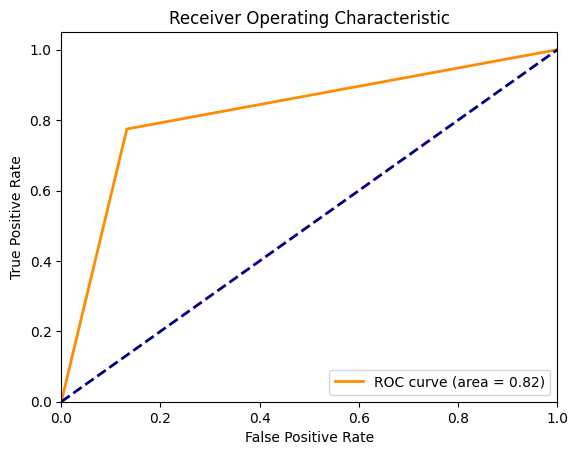

In [ ]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(Y_test_new, Y_pred_test_new)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.25501106 -0.61059268 -0.46015262 -0.12710839  0.06659723 -3.71042663
  -0.37216466]]
Intercept: [4.13260915]


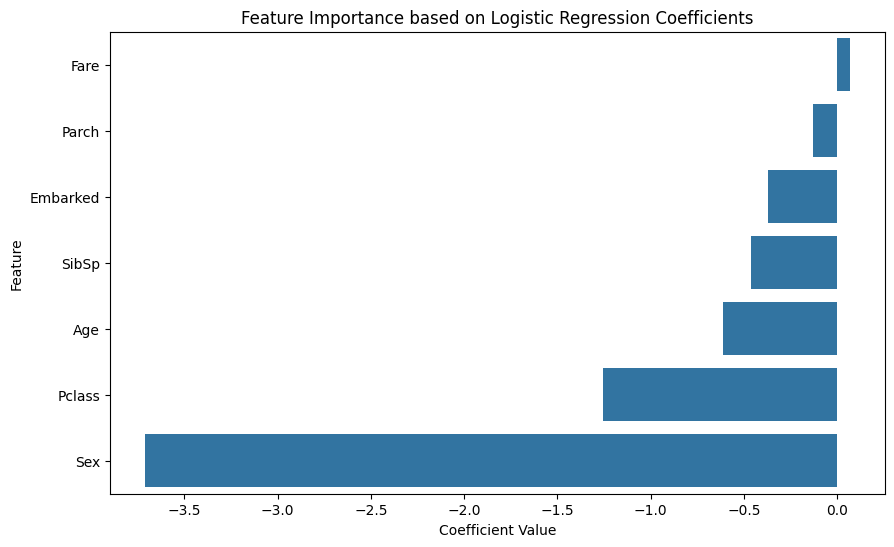

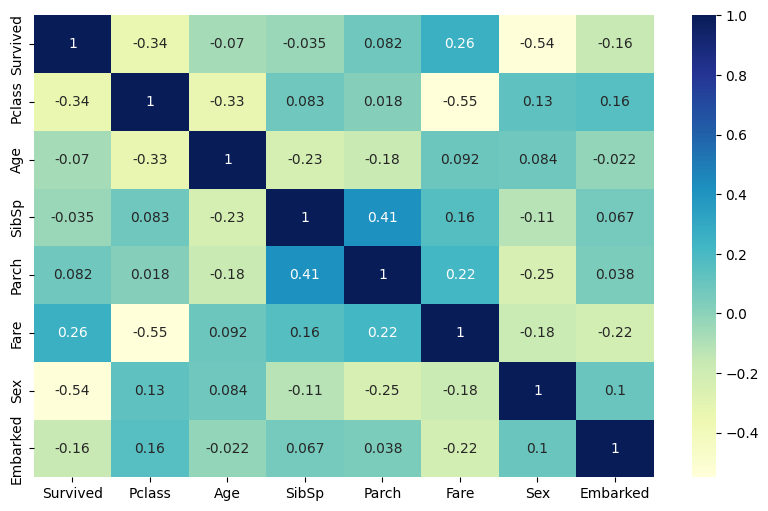

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_final' DataFrame and 'model' (Logistic Regression) are defined as in the provided code.

def plot_feature_importance(model, X_train_new):
    """Plots feature importance based on logistic regression coefficients."""
    feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Coefficient': model.coef_[0]})
    feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title('Feature Importance based on Logistic Regression Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(model, X_train_new)


# Further analysis of feature significance (add more code here if needed)
# Example:  Correlation matrix
plt.figure(figsize = (10,6))
sns.heatmap(train_final.corr(),annot = True,cmap="YlGnBu")
plt.show()